In [2]:
import pandas as pd
file_path = "Dpt.csv"
data = pd.read_csv(file_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1916 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [4]:
data.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,01/07/2019,15987,9962,407,21223,3715,NaN
1,30/08/2024,16436,10705,225,19026,3925,59.0
2,15/09/2023,15499,10671,267,18421,4519,61.0
3,28/12/2021,1756,2352,0,3775,0,13.0
4,11/01/2023,10536,8347,223,14072,0,48.0


In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y') # Changed 'date' to 'data' to refer to the DataFrame
data = data.set_index('Date')

In [8]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2023-07-26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local Route   1918 non-null   int64  
 1   Light Rail    1918 non-null   int64  
 2   Peak Service  1918 non-null   int64  
 3   Rapid Route   1918 non-null   int64  
 4   School        1918 non-null   int64  
 5   Other         1917 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 104.9 KB


<ipython-input-8-0482a7f2ab4a>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


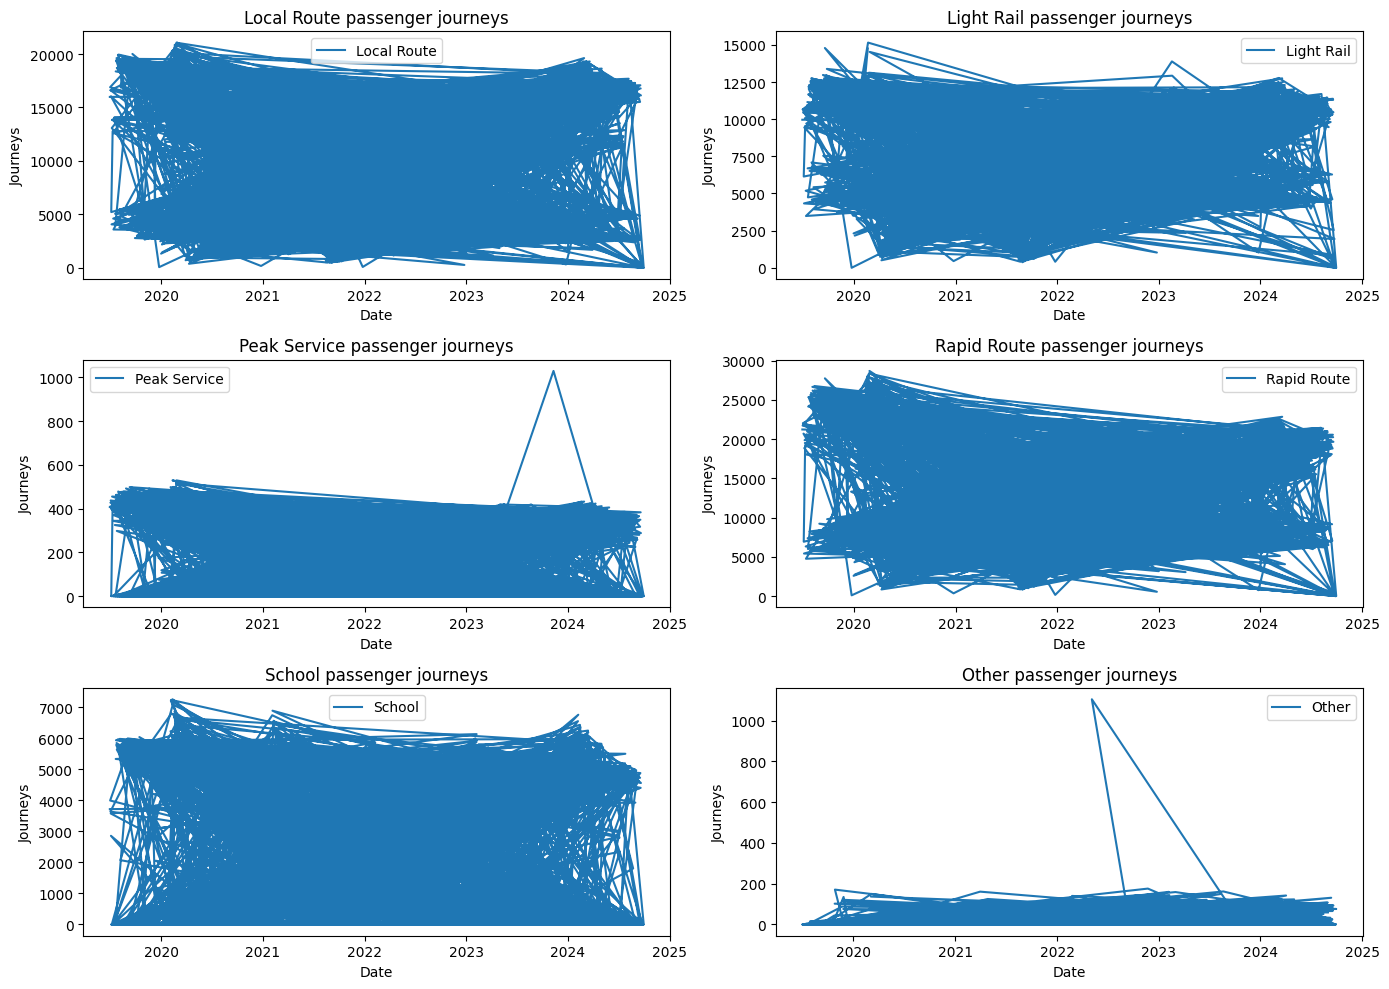

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
for i ,column in enumerate(data.columns,1):
    plt.subplot(3,2,i)
    plt.plot(data.index,data[column],label = column)
    plt.title(f'{column} passenger journeys')
    plt.xlabel('Date')
    plt.ylabel('Journeys')
    plt.legend()
plt.tight_layout()
plt.show()

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

forecast_period = 7

forecast_results = {}
last_date =data.index.max()
for column in data.columns:
    if column not in ['Other','Total']:
        model = ExponentialSmoothing(data[column], trend='add', seasonal='add', seasonal_periods=365)
        fit = model.fit()
        forecast = fit.forecast(forecast_period)
        forecast_results[column] = forecast

forecast_df = pd.DataFrame(forecast_results)
forecast_df.index = pd.date_range(last_date + pd.Timedelta(days=1), periods=forecast_period)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is av

In [49]:
forecast_df

,Local Route,Light Rail,Peak Service,Rapid Route,School,weekday
2024-09-30,15841.924830,9873.533697,298.759423,18261.069571,5007.701930,2.167012
2024-10-01,9216.085963,6084.094530,179.346881,11058.578422,2601.992511,2.766565
2024-10-02,11186.734025,8159.806338,246.461595,14080.133704,1513.630345,2.366508
2024-10-03,15491.755212,9862.614988,276.288132,17462.333351,5499.855005,2.566737
2024-10-04,11230.450350,8385.853435,283.533774,15066.710687,1308.083527,2.567293
2024-10-05,3055.750057,3254.819721,5.039631,5007.849112,56.647555,4.966808
2024-10-06,4652.281162,5115.439695,41.700446,7871.708187,53.613861,4.166662


In [51]:
# Calculate monthly averages to observe growth or decline patterns over time
monthly_avg = data.resample('M').mean()
monthly_avg

<ipython-input-51-c78ecda26f23>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data.resample('M').mean()


,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total,weekday
Date,,,,,,,,
2019-07-31,13116.354839,9440.032258,307.096774,17903.290323,2057.193548,1.533333,42543.166667,2.806452
2019-08-31,14735.387097,10206.967742,307.064516,20101.096774,3852.225806,1.129032,49203.870968,3.096774
2019-09-30,14146.633333,10177.800000,306.800000,19484.666667,3722.966667,0.800000,47839.666667,3.000000
2019-10-31,13152.645161,10332.580645,294.806452,19792.645161,2563.096774,10.645161,46146.419355,2.903226
2019-11-30,13773.766667,10050.600000,302.700000,19364.333333,3824.066667,18.966667,47334.433333,3.100000
...,...,...,...,...,...,...,...,...
2024-05-31,13428.709677,9436.322581,242.322581,16027.290323,3688.290323,60.612903,42883.548387,3.000000
2024-06-30,11433.933333,8239.700000,200.600000,14085.233333,2975.733333,53.666667,36988.866667,3.166667
2024-07-31,11312.000000,8715.129032,231.870968,14891.451613,1617.419355,58.129032,36826.000000,2.806452


In [52]:
# Identify peak days by finding the highest values in each service type
peak_days = data.idxmax()
peak_days

,0
Local Route,2020-02-27
Light Rail,2020-02-22
Peak Service,2023-11-10
Rapid Route,2020-02-27
School,2020-02-11
Other,2022-05-06
Total,2020-02-27
weekday,2022-05-08


In [36]:
# Calculate growth rate by taking the percentage change over months for each service type
monthly_growth_rate = monthly_avg.pct_change().dropna() * 100
monthly_growth_rate

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total,weekday
Date,,,,,,,,
2019-08-31,12.343614,8.124289,-0.010504,12.275992,87.256362,-26.367461,15.656343,10.344828
2019-09-30,-3.995509,-0.285763,-0.086144,-3.066649,-3.355440,-29.142857,-2.772555,-3.125000
2019-10-31,-7.026323,1.520767,-3.909240,1.580620,-31.154453,1230.645161,-3.539421,-3.225806
2019-11-30,4.722408,-2.729044,2.677536,-2.163995,49.197124,78.171717,2.574445,6.777778
2019-12-31,-27.606187,-21.100201,-31.988448,-26.722114,-63.819129,-97.788990,-28.844816,-5.306972
...,...,...,...,...,...,...,...,...
2024-05-31,18.552075,6.818232,1.759202,6.406424,100.348935,-3.584990,14.767660,5.882353
2024-06-30,-14.854565,-12.681027,-17.217785,-12.117189,-19.319439,-11.459996,-13.745788,5.555556
2024-07-31,-1.066416,5.769980,15.588718,5.723855,-45.646361,8.314967,-0.440313,-11.375212


In [37]:
# Determine weekday vs weekend averages for each service type
data['weekday'] = data.index.dayofweek
weekday_vs_weekend = data.groupby(['weekday']).mean()
weekday_vs_weekend

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total
weekday,,,,,,,
0,11444.678832,7541.551095,235.678832,13858.824818,3014.364964,44.428571,36083.853480
1,13243.072993,8591.718978,281.729927,15949.737226,3454.277372,51.813869,41572.350365
2,13378.525547,8620.357664,281.748175,15995.645985,3504.244526,55.722628,41836.244526
3,13166.708029,8515.218978,255.058394,15740.025547,3369.963504,57.828467,41104.802920
4,12543.755474,8510.229927,202.854015,14942.156934,3125.795620,54.408759,39379.200730
5,3271.156934,5000.978102,0.000000,6640.737226,0.145985,18.813869,14931.832117
6,2191.868613,3588.069343,0.000000,5053.364964,0.072993,17.992701,10851.368613


In [50]:
forecast_df

,Local Route,Light Rail,Peak Service,Rapid Route,School,weekday
2024-09-30,15841.924830,9873.533697,298.759423,18261.069571,5007.701930,2.167012
2024-10-01,9216.085963,6084.094530,179.346881,11058.578422,2601.992511,2.766565
2024-10-02,11186.734025,8159.806338,246.461595,14080.133704,1513.630345,2.366508
2024-10-03,15491.755212,9862.614988,276.288132,17462.333351,5499.855005,2.566737
2024-10-04,11230.450350,8385.853435,283.533774,15066.710687,1308.083527,2.567293
2024-10-05,3055.750057,3254.819721,5.039631,5007.849112,56.647555,4.966808
2024-10-06,4652.281162,5115.439695,41.700446,7871.708187,53.613861,4.166662


<Axes: >

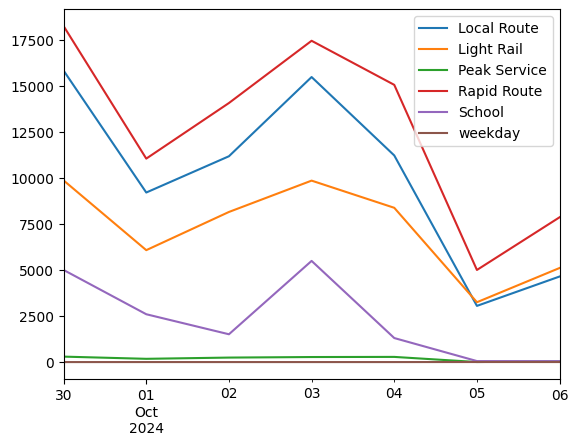

In [53]:
forecast_df.plot()

In [55]:
peakdays = forecast_df.idxmax()
peakdays

,0
Local Route,2024-09-30
Light Rail,2024-09-30
Peak Service,2024-09-30
Rapid Route,2024-09-30
School,2024-10-03
weekday,2024-10-05


In [57]:
forecast_df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,weekday
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,10096.425943,7248.023200,190.161412,12686.911862,2291.646390,3.081084
std,4908.834659,2506.781406,120.780196,4937.712950,2211.432010,1.057358
min,3055.750057,3254.819721,5.039631,5007.849112,53.613861,2.167012
25%,6934.183563,5599.767112,110.523664,9465.143304,682.365541,2.466623
50%,11186.734025,8159.806338,246.461595,14080.133704,1513.630345,2.567293
75%,13361.102781,9124.234212,279.910953,16264.522019,3804.847221,3.466613
max,15841.924830,9873.533697,298.759423,18261.069571,5499.855005,4.966808
